In [4]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark 3.3.2 (working mirror)
!wget -q https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

# Extract Spark
!tar -xvzf spark-3.3.2-bin-hadoop3.tgz

# Install findspark
!pip install -q findspark

spark-3.3.2-bin-hadoop3/
spark-3.3.2-bin-hadoop3/LICENSE
spark-3.3.2-bin-hadoop3/NOTICE
spark-3.3.2-bin-hadoop3/R/
spark-3.3.2-bin-hadoop3/R/lib/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.2-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.2-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.2-bin-hadoop3/R/lib/Spar

In [6]:
import os
import findspark

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

findspark.init()

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("US Gov Spending Analysis") \
    .getOrCreate()

spark

In [8]:
from google.colab import files
uploaded = files.upload()

Saving gov_spending.csv to gov_spending.csv


In [9]:
df = spark.read.csv("gov_spending.csv", header=True, inferSchema=True)
df.show()

+----------+---------+-----------------+-----+-----------+----------+---------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|             City|State|Postal Code|Model Year|     Make|   Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+-----------------+-----+-----------+----------+---------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|1N4BZ0CP5G|     King|          Seattle|   WA|      98125|      2016|   NISSAN|    LEAF| Battery Electric ...|                             Clean Alternati

In [10]:
df = spark.read.csv("gov_spending.csv", header=True, inferSchema=True)
df.show()

+----------+---------+-----------------+-----+-----------+----------+---------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|   County|             City|State|Postal Code|Model Year|     Make|   Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+---------+-----------------+-----+-----------+----------+---------+--------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|1N4BZ0CP5G|     King|          Seattle|   WA|      98125|      2016|   NISSAN|    LEAF| Battery Electric ...|                             Clean Alternati

In [11]:
# Drop any rows with missing values (if needed)
df_clean = df.dropna()

# View data types
df_clean.printSchema()

# Optional: Show total number of rows
print("Total Records:", df_clean.count())

root
 |-- VIN (1-10): string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Clean Alternative Fuel Vehicle (CAFV) Eligibility: string (nullable = true)
 |-- Electric Range: integer (nullable = true)
 |-- Base MSRP: integer (nullable = true)
 |-- Legislative District: integer (nullable = true)
 |-- DOL Vehicle ID: integer (nullable = true)
 |-- Vehicle Location: string (nullable = true)
 |-- Electric Utility: string (nullable = true)
 |-- 2020 Census Tract: long (nullable = true)

Total Records: 246764


In [14]:
df_clean.groupBy("Make").count().orderBy("count", ascending=False).show()

+-------------+------+
|         Make| count|
+-------------+------+
|        TESLA|104728|
|    CHEVROLET| 17817|
|       NISSAN| 15878|
|         FORD| 13239|
|          KIA| 11963|
|          BMW| 10348|
|       TOYOTA| 10208|
|      HYUNDAI|  8031|
|       RIVIAN|  7476|
|   VOLKSWAGEN|  6415|
|        VOLVO|  6411|
|         JEEP|  6115|
|         AUDI|  4539|
|     CHRYSLER|  3455|
|MERCEDES-BENZ|  2723|
|        HONDA|  2375|
|       SUBARU|  2099|
|      PORSCHE|  1637|
|     POLESTAR|  1423|
|     CADILLAC|  1375|
+-------------+------+
only showing top 20 rows



In [15]:
df_clean.groupBy("Model Year").count().orderBy("Model Year").show()

+----------+-----+
|Model Year|count|
+----------+-----+
|      2000|    8|
|      2002|    2|
|      2003|    1|
|      2008|   17|
|      2010|   23|
|      2011|  656|
|      2012| 1459|
|      2013| 4164|
|      2014| 3354|
|      2015| 4601|
|      2016| 5288|
|      2017| 8731|
|      2018|14465|
|      2019|11028|
|      2020|12354|
|      2021|20725|
|      2022|29233|
|      2023|58947|
|      2024|49733|
|      2025|20790|
+----------+-----+
only showing top 20 rows



In [16]:
df_clean.groupBy("City").count().orderBy("count", ascending=False).show(10)

+---------+-----+
|     City|count|
+---------+-----+
|  Seattle|39521|
| Bellevue|12122|
|Vancouver| 9171|
|  Redmond| 8605|
|  Bothell| 8157|
| Kirkland| 7075|
|Sammamish| 6976|
|   Renton| 6851|
|  Olympia| 5941|
|   Tacoma| 5513|
+---------+-----+
only showing top 10 rows



In [17]:
df_clean.groupBy("Electric Vehicle Type").count().orderBy("count", ascending=False).show()

+---------------------+------+
|Electric Vehicle Type| count|
+---------------------+------+
| Battery Electric ...|196744|
| Plug-in Hybrid El...| 50020|
+---------------------+------+



In [18]:
df_clean.groupBy("County").count().orderBy("count", ascending=False).show()

+---------+------+
|   County| count|
+---------+------+
|     King|122808|
|Snohomish| 30585|
|   Pierce| 20533|
|    Clark| 15047|
| Thurston|  9081|
|   Kitsap|  8374|
|  Spokane|  6970|
|  Whatcom|  6030|
|   Benton|  3320|
|   Skagit|  2842|
|   Island|  2703|
|   Yakima|  1654|
|   Chelan|  1530|
|  Clallam|  1499|
|Jefferson|  1307|
|  Cowlitz|  1279|
|    Mason|  1216|
| San Juan|  1188|
|    Lewis|  1111|
| Franklin|   985|
+---------+------+
only showing top 20 rows



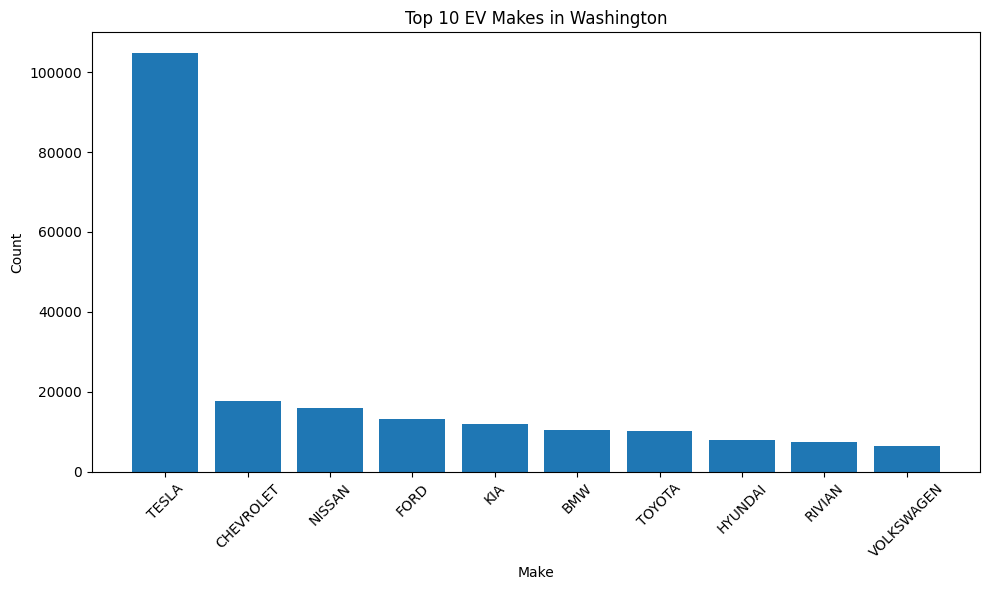

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

top_makes = df_clean.groupBy("Make").count().orderBy("count", ascending=False).limit(10).toPandas()

plt.figure(figsize=(10,6))
plt.bar(top_makes['Make'], top_makes['count'])
plt.title("Top 10 EV Makes in Washington")
plt.xticks(rotation=45)
plt.xlabel("Make")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [20]:
!apt-get install graphviz -qq
!pip install graphviz

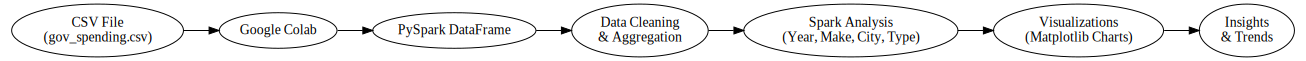

In [21]:
from graphviz import Digraph

dot = Digraph()

dot.attr(rankdir='LR')  # Left to Right layout

# Define nodes
dot.node('A', 'CSV File\n(gov_spending.csv)')
dot.node('B', 'Google Colab')
dot.node('C', 'PySpark DataFrame')
dot.node('D', 'Data Cleaning\n& Aggregation')
dot.node('E', 'Spark Analysis\n(Year, Make, City, Type)')
dot.node('F', 'Visualizations\n(Matplotlib Charts)')
dot.node('G', 'Insights\n& Trends')

# Define edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')
dot.edge('E', 'F')
dot.edge('F', 'G')

# Display the diagram
dot.render('pipeline_diagram', format='png', cleanup=False)
dot